# Zonal Statistics - continuous values

If you are interested of NDVI mean by polygon for each date of a timeserie for instance.

In [57]:
import glob, os
import pandas as pd
import geopandas as gpd
import rasterio
import rasterio.plot
import rasterstats
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
from pathlib import Path
import datetime
from IPython.display import display
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline
plotly.offline.init_notebook_mode()

print('All libraries successfully imported!')
print(f'Rasterstats : {rasterstats.__version__}')

All libraries successfully imported!
Rasterstats : 0.17.0


In [58]:
import warnings
warnings.filterwarnings("ignore")

print("BE CAREFULL warning are masked !!")

BE CAREFULL warning are masked !!


**Set parameters**

Choose statistics :
- min
- max
- mean

In [59]:
site = 'NAMUR'
year = '2020'

index_name = 'NDVI'

stat_name = 'mean'

nodata_val = -10000

start = '20200101'
end   = '20201231'

**Date**

The date must be in each image filename. `begin_date` is the first position of the date

E.g. : "SITE_3_**2**0181108_NDVI.tif" --> **begin_date = 8**

In [60]:
format     = '%Y%m%d' # format : YYYYMMDD
begin_date = 8

**Set directory**

In [61]:
computer_path = '/export/miro/ndeffense/LBRAT2104/'
grp_nb        = '99'

# Directory for all work files
work_path = f'{computer_path}STUDENTS/GROUP_{grp_nb}/TP/'  # Directory for all work files


# Rasters files directory
raster_file_list = sorted(glob.glob(f'{work_path}{index_name}/*{index_name}.tif'))

# Vector file
vector_file  = f'{work_path}B_IN_SITU_PREPRO/{site}_{year}_IN_SITU_ROI_prepared.shp'


# Zonal statistics output
zonal_stat_path = f'{work_path}ZONAL_STATS/'
zonal_stat_csv  = f'{zonal_stat_path}{site}_{year}_zonal_stat_cont_{index_name}.csv'
zonal_stat_shp  = f'{zonal_stat_path}{site}_{year}_zonal_stat_cont_{index_name}.shp'

Path(zonal_stat_path).mkdir(parents=True, exist_ok=True)

**Check if raster and vector are projected to the same CRS**

In [62]:
gdf = gpd.read_file(vector_file)
src = rasterio.open(raster_file_list[0], "r")

crs_vector = str(gdf.crs).split(":",1)[1]
crs_raster = str(src.crs).split(":",1)[1]

if crs_vector == crs_raster:
    print(f'CRS are the same : EPSG:{crs_vector} = EPSG:{crs_raster}')
else:
    print('We must reproject vector file')

    gdf = gdf.to_crs(epsg=crs_raster)

CRS are the same : EPSG:32631 = EPSG:32631


**Check if raster and vector file are intersecting**

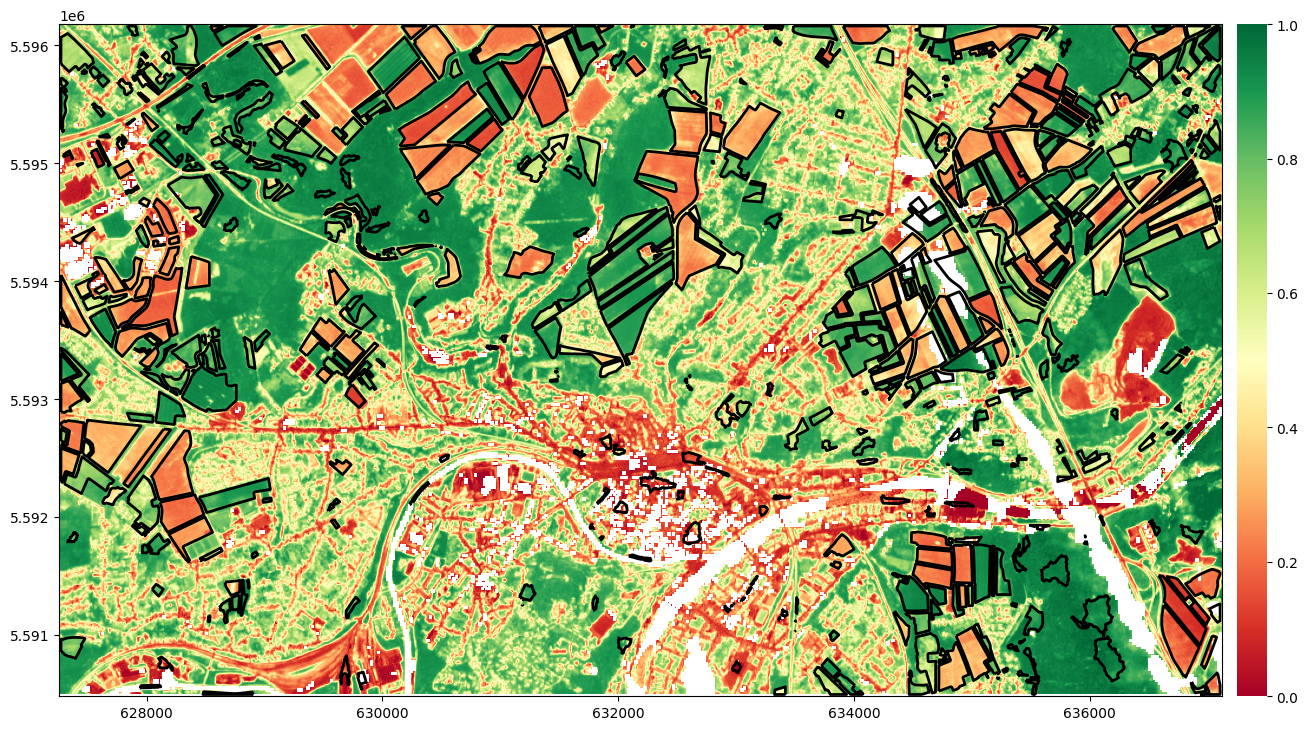

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

# Plot vector
gdf.plot(facecolor='none', edgecolor='black', linewidth = 2, ax=ax)

# Plot image
color_map = plt.cm.get_cmap("RdYlGn")
reversed_color_map = color_map.reversed()

src = rasterio.open(raster_file_list[6], "r")
im_rio = rasterio.plot.show(src, cmap=color_map, vmin=0, vmax=1, ax=ax)
im_rio = im_rio.get_images()[0]

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im_rio, ax=ax, cax=cax)


plt.box(False)

**Create a new column ID**

get one single ID per polygon

In [64]:
gdf["id"] = gdf.index

display(gdf)

id  lc_nb                     lc  grp_nb                    grp  \
0      0      3  Grassland and meadows      31  Grassland and meadows   
1      1      3  Grassland and meadows      31  Grassland and meadows   
2      2      3  Grassland and meadows      31  Grassland and meadows   
3      3      3  Grassland and meadows      31  Grassland and meadows   
4      4      3  Grassland and meadows      31  Grassland and meadows   
..   ...    ...                    ...     ...                    ...   
532  532      6                 Forest      69                 Forest   
533  533      6                 Forest      69                 Forest   
534  534      6                 Forest      69                 Forest   
535  535      6                 Forest      69                 Forest   
536  536      6                 Forest      69                 Forest   

     class_nb                  class  sub_nb                    sub  grp_1_nb  \
0         319  Grassland and meadows    3199  Grassland and meadows         3   
1         319  Grassland and meadows    3199  Grassland and meadows         3   
2         319  Grassland and meadows    3199  Grassland and meadows         3   
3         319  Grassland and meadows    3199  Grassland and meadows         3   
4         319  Grassland and meadows    3199  Grassland and meadows         3   
..        ...                    ...     ...                    ...       ...   
532       699                 Forest    6999                 Forest        69   
533       699                 Forest    6999                 Forest        69   
534       699                 Forest    6999                 Forest        69   
535       699                 Forest    6999                 Forest        69   
536       699                 Forest    6999                 Forest        69   

                     grp_1  grp_A_nb                  grp_A   area  pix_count  \
0    Grassland and meadows         3  Grassland and meadows   1735         17   
1    Grassland and meadows         3  Grassland and meadows  14331        146   
2    Grassland and meadows         3  Grassland and meadows   1768         18   
3    Grassland and meadows         3  Grassland and meadows   7828         79   
4    Grassland and meadows         3  Grassland and meadows   3197         39   
..                     ...       ...                    ...    ...        ...   
532                 Forest         6                 Forest   6221         64   
533                 Forest         6                 Forest   6792         65   
534                 Forest         6                 Forest   1416         14   
535                 Forest         6                 Forest   7935         82   
536                 Forest         6                 Forest   4670         47   

                                              geometry  
0    MULTIPOLYGON (((630003.573 5594258.004, 630003...  
1    POLYGON ((636962.589 5595674.757, 636966.536 5...  
2    POLYGON ((635692.119 5593303.601, 635688.405 5...  
3    POLYGON ((627911.368 5595749.375, 627942.033 5...  
4    POLYGON ((633236.525 5596165.100, 633397.286 5...  
..                                                 ...  
532  POLYGON ((629637.453 5595004.884, 629637.670 5...  
533  POLYGON ((629067.212 5595065.248, 629067.346 5...  
534  MULTIPOLYGON (((628763.069 5595549.167, 628763...  
535  POLYGON ((631930.369 5595869.595, 631930.856 5...  
536  POLYGON ((635764.747 5595906.026, 635766.406 5...  

[537 rows x 16 columns]

**Get date of each image**

In [65]:
dict_list = []

for im in raster_file_list:
            
        date_str = os.path.basename(im)[begin_date-1:begin_date-1+8]

        date_im = datetime.datetime.strptime(date_str, format).date()

        dict_list.append({'date': date_im,
                          'im_path': im})

im_date_path_df = pd.DataFrame.from_dict(dict_list).sort_values('date')

display(im_date_path_df)

date                                            im_path
0   2020-01-16  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
1   2020-02-12  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
2   2020-03-16  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
3   2020-04-17  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
4   2020-05-20  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
5   2020-06-21  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
6   2020-07-19  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
7   2020-08-13  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
8   2020-09-14  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
9   2020-10-19  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
10  2020-11-18  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
11  2020-12-18  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...

**Select images inside a period**

In [66]:
start_date = datetime.datetime.strptime(start, format).date()
end_date   = datetime.datetime.strptime(end, format).date()

mask = (im_date_path_df['date'] > start_date) & (im_date_path_df['date'] <= end_date)

im_date_path_df = im_date_path_df.loc[mask]

display(im_date_path_df)

date                                            im_path
0   2020-01-16  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
1   2020-02-12  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
2   2020-03-16  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
3   2020-04-17  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
4   2020-05-20  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
5   2020-06-21  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
6   2020-07-19  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
7   2020-08-13  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
8   2020-09-14  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
9   2020-10-19  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
10  2020-11-18  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...
11  2020-12-18  /export/miro/ndeffense/LBRAT2104/STUDENTS/GROU...

## Compute zonal statistics

In [67]:
def mean_div_std(x):

    mean = np.mean(x)
    std  = np.std(x)

    result = mean / std

    return result

In [68]:
df_list = []
date_list = []

for i, row in im_date_path_df.iterrows():
    im_file    = row['im_path']
    long_date  = row['date']

    day   = str(long_date)[8:10]
    month = str(long_date)[5:7]
    year  = str(long_date)[0:4]
    
    print(long_date)

    date_list.append(long_date)

    date = day + month + year  # Year at the end because it will be truncated when saved to ESRI Shapefile

    # Open GeoTIFF file
    src = rasterio.open(im_file, 'r')
    im_arr = src.read(1)
    
    # Change NaN by "nodata_val"
    im_arr = np.nan_to_num(im_arr, nan=nodata_val)

    # Get transform from profile (metadata)
    profile = src.profile
    transform = profile['transform']
    
    src.close()

    df = pd.DataFrame(zonal_stats(gdf,
                                  im_arr,
                                  affine=transform,
                                  stats=['count','nodata','mean','std'],
                                  nodata=nodata_val,
                                  add_stats={'mean_div_std':mean_div_std}
                                  ))
    
    df = df.rename(columns={'count': f'valid_{date}','nodata': f'nan___{date}','mean': f'mean__{date}','std': f'std___{date}', 'mean_div_std':f'mDIVs_{date}'})

    df[f'nan___{date}'] = df[f'nan___{date}'].fillna(0)
    df = df.astype({f'nan___{date}': int, f'mDIVs_{date}': float})
    
    df_list.append(df)
    

dfs = pd.concat(df_list, axis=1).round(4)

display(dfs)


2020-01-16
2020-02-12
2020-03-16
2020-04-17
2020-05-20
2020-06-21
2020-07-19
2020-08-13
2020-09-14
2020-10-19
2020-11-18
2020-12-18


mean__16012020  valid_16012020  std___16012020  nan___16012020  \
0            0.7138              14          0.0312               3   
1            0.7415             146          0.0574               0   
2            0.7406              16          0.0357               2   
3            0.7697              79          0.0260               0   
4            0.7980              39          0.0330               0   
..              ...             ...             ...             ...   
532          0.6257              64          0.0416               0   
533          0.6394              65          0.0569               0   
534             NaN               0             NaN              14   
535          0.6236              40          0.0644              42   
536          0.6647              23          0.0568              24   

     mDIVs_16012020  valid_12022020  nan___12022020  mean__12022020  \
0           22.8455               0              17             NaN   
1           12.9216               0             146             NaN   
2           20.7215              16               2          0.4786   
3           29.6047               0              79             NaN   
4           24.1716               0              39             NaN   
..              ...             ...             ...             ...   
532         15.0567              64               0          0.5734   
533         11.2332              65               0          0.5745   
534             NaN              12               2          0.3550   
535          9.6894               1              81          0.1161   
536         11.6986              25              22          0.2398   

     std___12022020  mDIVs_12022020  ...  mean__18112020  valid_18112020  \
0               NaN             NaN  ...          0.6841              17   
1               NaN             NaN  ...          0.8539             146   
2            0.0737          6.4962  ...          0.8535              18   
3               NaN             NaN  ...          0.7640              79   
4               NaN             NaN  ...          0.8348              39   
..              ...             ...  ...             ...             ...   
532          0.0492         11.6547  ...          0.6797              64   
533          0.0571         10.0580  ...          0.6395              65   
534          0.0127         27.9002  ...          0.6449               2   
535          0.0000             inf  ...          0.6887              76   
536          0.0488          4.9141  ...          0.6656              46   

     std___18112020  nan___18112020  mDIVs_18112020  mean__18122020  \
0            0.0833               0          8.2141          0.6790   
1            0.0448               0         19.0409          0.8351   
2            0.0480               0         17.7676          0.6954   
3            0.0298               0         25.6160          0.7487   
4            0.0193               0         43.1866          0.7169   
..              ...             ...             ...             ...   
532          0.0526               0         12.9094          0.6268   
533          0.0438               0         14.5848          0.5966   
534          0.0047              12        136.3782             NaN   
535          0.0549               6         12.5514          0.6078   
536          0.0475               1         14.0081          0.6038   

     valid_18122020  std___18122020  nan___18122020  mDIVs_18122020  
0                 9          0.0630               8         10.7694  
1               144          0.0400               2         20.8726  
2                15          0.0386               3         17.9925  
3                79          0.0242               0         30.9224  
4                34          0.0484               5         14.8120  
..              ...             ...             ...             ...  
532              64          0.0401        

## Plot timeseries

In [69]:
df = dfs.filter(regex='mean')

display(df)

df['parcel_id'] = df.index

df = df.set_index('parcel_id')

df = df.transpose()

df['date'] = date_list


df = df.melt(id_vars=['date'], var_name='parcel_id')

df = df.merge(gdf, left_on='parcel_id', right_on='id')

df = df[['date','parcel_id','value','sub_nb','sub','grp_A_nb','grp_A']]

display(df)


mean__16012020  mean__12022020  mean__16032020  mean__17042020  \
0            0.7138             NaN          0.7600          0.8569   
1            0.7415             NaN          0.8128          0.8174   
2            0.7406          0.4786          0.8318             NaN   
3            0.7697             NaN          0.8018          0.8400   
4            0.7980             NaN          0.4641          0.8309   
..              ...             ...             ...             ...   
532          0.6257          0.5734          0.5438          0.6859   
533          0.6394          0.5745          0.5998          0.7141   
534             NaN          0.3550          0.5525          0.6162   
535          0.6236          0.1161          0.5103          0.7072   
536          0.6647          0.2398          0.6150             NaN   

     mean__20052020  mean__21062020  mean__19072020  mean__13082020  \
0            0.8904          0.7054          0.4930          0.5632   
1            0.5072          0.7863          0.9105          0.6131   
2            0.9001          0.8394          0.8954          0.5452   
3            0.4847          0.9029          0.4884          0.5349   
4            0.8320          0.8217          0.8290          0.3623   
..              ...             ...             ...             ...   
532          0.9101          0.9130          0.9377          0.8739   
533          0.9138          0.8710          0.9132          0.8554   
534          0.9080          0.7159          0.9503          0.8802   
535          0.8557          0.5647          0.8717          0.8514   
536          0.8883          0.9107          0.9244          0.9003   

     mean__14092020  mean__19102020  mean__18112020  mean__18122020  
0            0.7701          0.8299          0.6841          0.6790  
1            0.5675          0.5559          0.8539          0.8351  
2            0.8298          0.7781          0.8535          0.6954  
3            0.7208          0.8706          0.7640          0.7487  
4            0.4581          0.7578          0.8348          0.7169  
..              ...             ...             ...             ...  
532          0.8851          0.8435          0.6797          0.6268  
533          0.8620          0.8155          0.6395          0.5966  
534          0.8603          0.8137          0.6449             NaN  
535          0.8651          0.8027          0.6887          0.6078  
536          0.8556          0.8268          0.6656          0.6038  

[537 rows x 12 columns]

date parcel_id   value  sub_nb                    sub  grp_A_nb  \
0     2020-01-16         0  0.7138    3199  Grassland and meadows         3   
1     2020-02-12         0     NaN    3199  Grassland and meadows         3   
2     2020-03-16         0  0.7600    3199  Grassland and meadows         3   
3     2020-04-17         0  0.8569    3199  Grassland and meadows         3   
4     2020-05-20         0  0.8904    3199  Grassland and meadows         3   
...          ...       ...     ...     ...                    ...       ...   
6439  2020-08-13       536  0.9003    6999                 Forest         6   
6440  2020-09-14       536  0.8556    6999                 Forest         6   
6441  2020-10-19       536  0.8268    6999                 Forest         6   
6442  2020-11-18       536  0.6656    6999                 Forest         6   
6443  2020-12-18       536  0.6038    6999                 Forest         6   

                      grp_A  
0     Grassland and meadows  
1     Grassland and meadows  
2     Grassland and meadows  
3     Grassland and meadows  
4     Grassland and meadows  
...                     ...  
6439                 Forest  
6440                 Forest  
6441                 Forest  
6442                 Forest  
6443                 Forest  

[6444 rows x 7 columns]

In [70]:
fig = px.line(df,
              x='date',
              y='value',
              color='grp_A_nb',
              line_group='parcel_id',
              hover_data=['sub_nb','sub'],
              title= 'title')

fig.show()

**Write output to shapefile**

In [71]:
gdf_with_zonal_stat = pd.concat([gdf, dfs], axis=1, join="inner")

display(gdf_with_zonal_stat)

#gdf_with_zonal_stat.columns = gdf_with_zonal_stat.columns.astype(str)


gdf_with_zonal_stat.to_file(zonal_stat_shp)

print(f'SHP file was created : {zonal_stat_shp}')

id  lc_nb                     lc  grp_nb                    grp  \
0      0      3  Grassland and meadows      31  Grassland and meadows   
1      1      3  Grassland and meadows      31  Grassland and meadows   
2      2      3  Grassland and meadows      31  Grassland and meadows   
3      3      3  Grassland and meadows      31  Grassland and meadows   
4      4      3  Grassland and meadows      31  Grassland and meadows   
..   ...    ...                    ...     ...                    ...   
532  532      6                 Forest      69                 Forest   
533  533      6                 Forest      69                 Forest   
534  534      6                 Forest      69                 Forest   
535  535      6                 Forest      69                 Forest   
536  536      6                 Forest      69                 Forest   

     class_nb                  class  sub_nb                    sub  grp_1_nb  \
0         319  Grassland and meadows    3199  Grassland and meadows         3   
1         319  Grassland and meadows    3199  Grassland and meadows         3   
2         319  Grassland and meadows    3199  Grassland and meadows         3   
3         319  Grassland and meadows    3199  Grassland and meadows         3   
4         319  Grassland and meadows    3199  Grassland and meadows         3   
..        ...                    ...     ...                    ...       ...   
532       699                 Forest    6999                 Forest        69   
533       699                 Forest    6999                 Forest        69   
534       699                 Forest    6999                 Forest        69   
535       699                 Forest    6999                 Forest        69   
536       699                 Forest    6999                 Forest        69   

     ... mean__18112020  valid_18112020 std___18112020  nan___18112020  \
0    ...         0.6841              17         0.0833               0   
1    ...         0.8539             146         0.0448               0   
2    ...         0.8535              18         0.0480               0   
3    ...         0.7640              79         0.0298               0   
4    ...         0.8348              39         0.0193               0   
..   ...            ...             ...            ...             ...   
532  ...         0.6797              64         0.0526               0   
533  ...         0.6395              65         0.0438               0   
534  ...         0.6449               2         0.0047              12   
535  ...         0.6887              76         0.0549               6   
536  ...         0.6656              46         0.0475               1   

     mDIVs_18112020 mean__18122020  valid_18122020  std___18122020  \
0            8.2141         0.6790               9          0.0630   
1           19.0409         0.8351             144          0.0400   
2           17.7676         0.6954              15          0.0386   
3           25.6160         0.7487              79          0.0242   
4           43.1866         0.7169              34          0.0484   
..              ...            ...             ...             ...   
532         12.9094         0.6268              64          0.0401   
533         14.5848         0.5966              65          0.0504   
534        136.3782            NaN               0             NaN   
535         12.5514         0.6078              44          0.0348   
536         14.0081         0.6038              37          0.0534   

     nan___18122020  mDIVs_18122020  
0                 8         10.7694  
1                 2         20.8726  
2                 3         17.9925  
3                 0         30.9224  
4                 5         14.8120  
..              ...             ...  
532               0         15.6494  
533               0         11.8441  
534              14             NaN  
535              38         17.4622  
536     

SHP file was created : /export/miro/ndeffense/LBRAT2104/STUDENTS/GROUP_99/TP/ZONAL_STATS/NAMUR_2020_zonal_stat_cont_NDVI.shp


**Write output to CSV**

In [72]:
gdf_with_zonal_stat = pd.concat([gdf, dfs], axis=1, join="inner")

gdf_with_zonal_stat = gdf_with_zonal_stat.drop(columns='geometry')

display(gdf_with_zonal_stat)

gdf_with_zonal_stat.to_csv(zonal_stat_csv)

print(f'CSV file was created : {zonal_stat_csv}')

id  lc_nb                     lc  grp_nb                    grp  \
0      0      3  Grassland and meadows      31  Grassland and meadows   
1      1      3  Grassland and meadows      31  Grassland and meadows   
2      2      3  Grassland and meadows      31  Grassland and meadows   
3      3      3  Grassland and meadows      31  Grassland and meadows   
4      4      3  Grassland and meadows      31  Grassland and meadows   
..   ...    ...                    ...     ...                    ...   
532  532      6                 Forest      69                 Forest   
533  533      6                 Forest      69                 Forest   
534  534      6                 Forest      69                 Forest   
535  535      6                 Forest      69                 Forest   
536  536      6                 Forest      69                 Forest   

     class_nb                  class  sub_nb                    sub  grp_1_nb  \
0         319  Grassland and meadows    3199  Grassland and meadows         3   
1         319  Grassland and meadows    3199  Grassland and meadows         3   
2         319  Grassland and meadows    3199  Grassland and meadows         3   
3         319  Grassland and meadows    3199  Grassland and meadows         3   
4         319  Grassland and meadows    3199  Grassland and meadows         3   
..        ...                    ...     ...                    ...       ...   
532       699                 Forest    6999                 Forest        69   
533       699                 Forest    6999                 Forest        69   
534       699                 Forest    6999                 Forest        69   
535       699                 Forest    6999                 Forest        69   
536       699                 Forest    6999                 Forest        69   

     ... mean__18112020  valid_18112020 std___18112020  nan___18112020  \
0    ...         0.6841              17         0.0833               0   
1    ...         0.8539             146         0.0448               0   
2    ...         0.8535              18         0.0480               0   
3    ...         0.7640              79         0.0298               0   
4    ...         0.8348              39         0.0193               0   
..   ...            ...             ...            ...             ...   
532  ...         0.6797              64         0.0526               0   
533  ...         0.6395              65         0.0438               0   
534  ...         0.6449               2         0.0047              12   
535  ...         0.6887              76         0.0549               6   
536  ...         0.6656              46         0.0475               1   

     mDIVs_18112020  mean__18122020  valid_18122020  std___18122020  \
0            8.2141          0.6790               9          0.0630   
1           19.0409          0.8351             144          0.0400   
2           17.7676          0.6954              15          0.0386   
3           25.6160          0.7487              79          0.0242   
4           43.1866          0.7169              34          0.0484   
..              ...             ...             ...             ...   
532         12.9094          0.6268              64          0.0401   
533         14.5848          0.5966              65          0.0504   
534        136.3782             NaN               0             NaN   
535         12.5514          0.6078              44          0.0348   
536         14.0081          0.6038              37          0.0534   

     nan___18122020  mDIVs_18122020  
0                 8         10.7694  
1                 2         20.8726  
2                 3         17.9925  
3                 0         30.9224  
4                 5         14.8120  
..              ...             ...  
532               0         15.6494  
533               0         11.8441  
534              14             NaN  
535              38         17.462

CSV file was created : /export/miro/ndeffense/LBRAT2104/STUDENTS/GROUP_99/TP/ZONAL_STATS/NAMUR_2020_zonal_stat_cont_NDVI.csv
